# 1. Importing important libraries
___

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 2.Reading Data
___

In [3]:
data = pd.read_csv(r"c:\Users\skynet\AppData\Local\Temp\Rar$DRa14180.42585\2019.csv")
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


# 3.Data Analysis
___

In [7]:
with open('info.text' ,'w') as f:
    for i in range(0,9):
        f.write(str(data[data.columns[:5]].info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Overall rank       156 non-null    int64  
 1   Country or region  156 non-null    object 
 2   Score              156 non-null    float64
 3   GDP per capita     156 non-null    float64
 4   Social support     156 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Overall rank       156 non-null    int64  
 1   Country or region  156 non-null    object 
 2   Score              156 non-null    float64
 3   GDP per capita     156 non-null    float64
 4   Social support     156 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.2+

### 3.1Finding Nulls
___


In [9]:
Nulls =data.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### 3.2Outliers
___


#### converted to float values

In [6]:

categorical_columns = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

#### Normalization

In [16]:
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

<Figure size 1200x800 with 0 Axes>

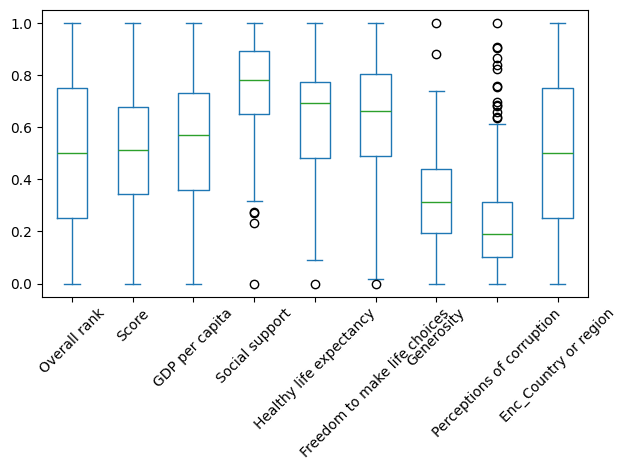

In [19]:
plt.figure(figsize=(12, 8))
data.plot(kind= 'box')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

In [43]:
for x in ['Perceptions of corruption' , 'Social support' ,'Freedom to make life choices' ]:
    q75, q25 = np.percentile(data.loc[:, x], [75, 25])
    intr_qr = q75 - q25
    max_val = q75 + (1.5 * intr_qr)
    min_val = q25 - (1.5 * intr_qr)
    
    print(f'for {x} Min Outliers has {data.loc[data[x] < min_val ,x].shape[0]} rows and max has {data.loc[data[x] > min_val , x].shape[0]} rows')
    
    data.loc[data[x]<min_val,x] = np.nan
    data.loc[data[x]>max_val,x] = np.nan
    
data = data.dropna(axis=0)
data.reset_index(inplace=True)
data.drop(['index'], axis=1 , inplace=True)

for Perceptions of corruption Min Outliers has 0 rows and max has 130 rows
for Social support Min Outliers has 0 rows and max has 130 rows
for Freedom to make life choices Min Outliers has 0 rows and max has 130 rows


In [32]:
for x in ['Perceptions of corruption' , 'Social support' ,'Freedom to make life choices' ]:
    q75, q25 = np.percentile(data.loc[:, x], [75, 25])
    intr_qr = q75 - q25
    max_val = q75 + (1.5 * intr_qr)
    min_val = q25 - (1.5 * intr_qr)
    
    print(f'for {x} Min Outliers has {data.loc[data[x] < min_val ,x].shape[0]} rows and max has {data.loc[data[x] > min_val , x].shape[0]} rows')
    

for Perceptions of corruption Min Outliers has 0 rows and max has 156 rows
for Social support Min Outliers has 4 rows and max has 152 rows
for Freedom to make life choices Min Outliers has 1 rows and max has 155 rows


# 5. Visualization(showing Data)
___

## 5.1 (scatter plot)

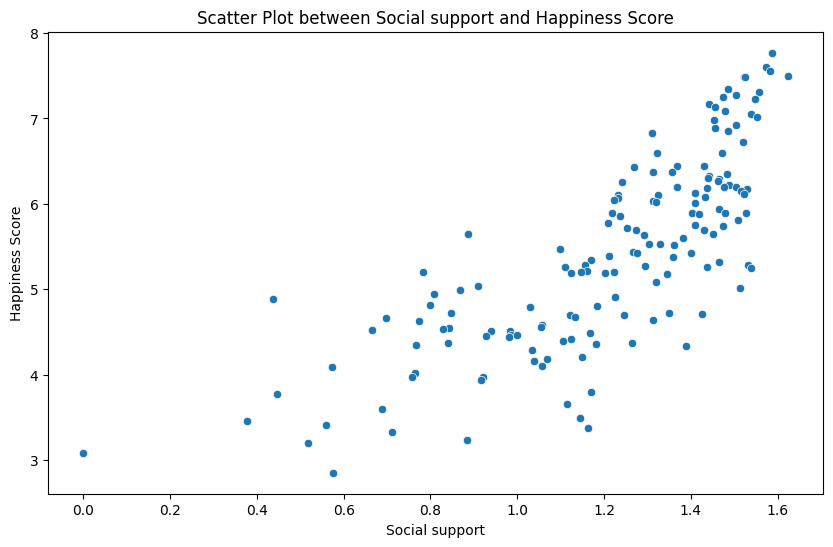

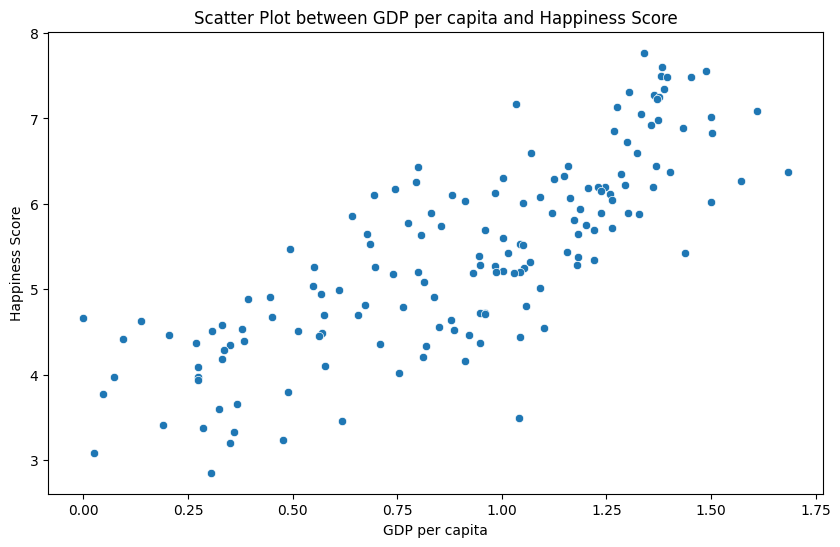

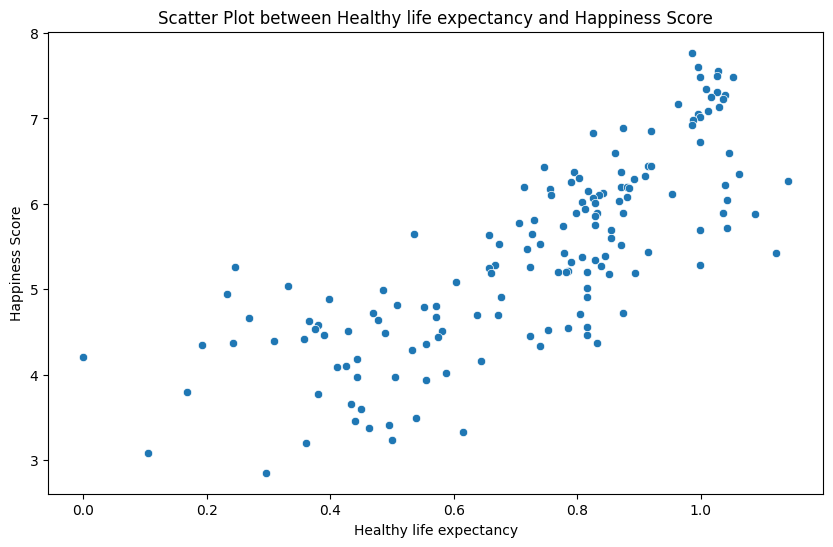

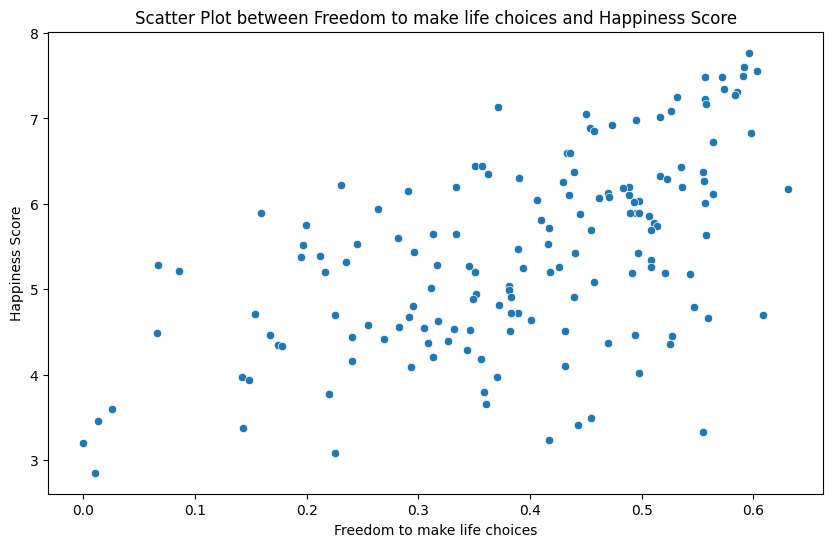

In [4]:
features = ['Social support', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=feature, y='Score')
    plt.title(f'Scatter Plot between {feature} and Happiness Score')
    plt.xlabel(feature)
    plt.ylabel('Happiness Score')
    plt.show()

## 5.2 Correlation Matrix

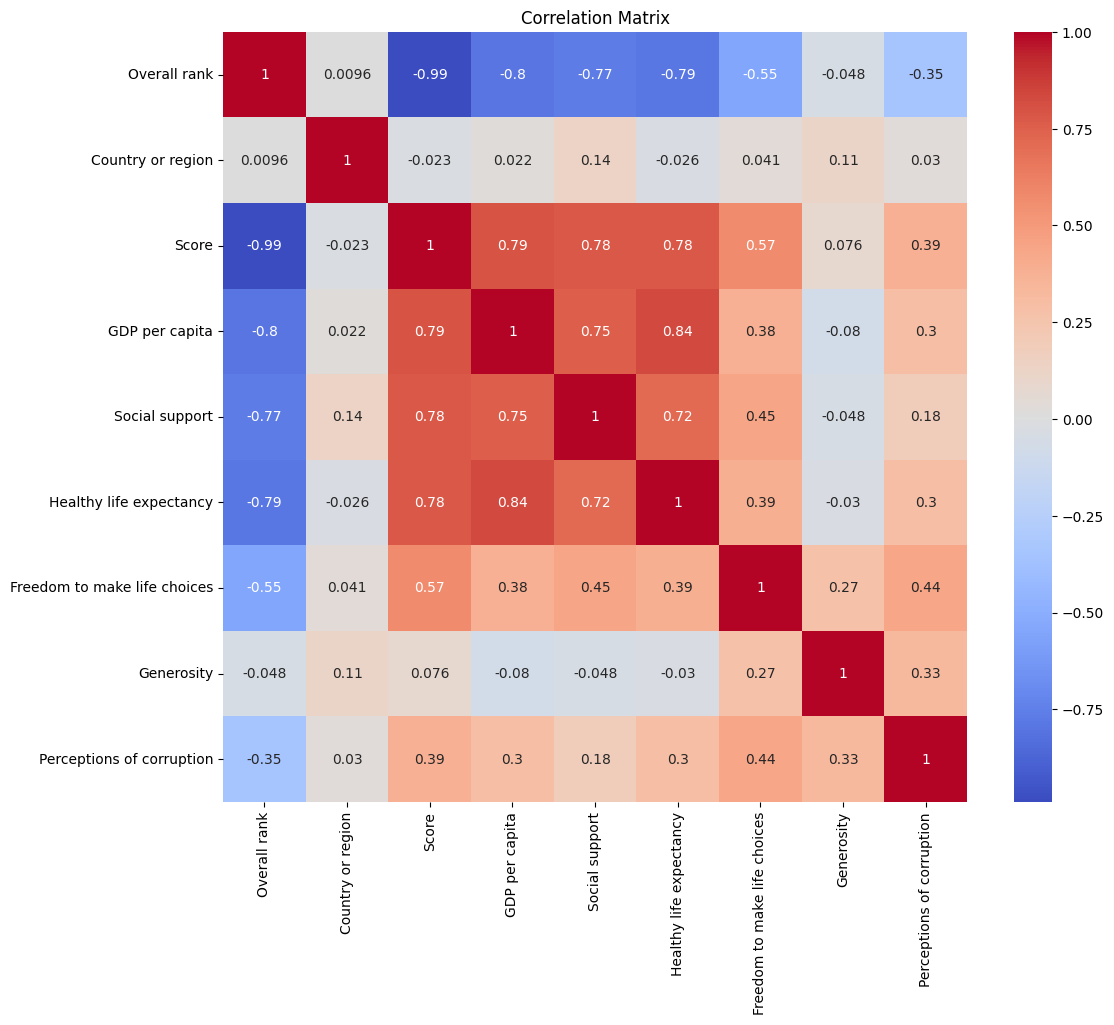

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 6.Building Model
___

In [26]:
x = data.drop(['Score'] , axis = 1)
y = data['Score']

In [27]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state=44 , shuffle=True)
print(x_train.shape)
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape)

(117, 8)
(39, 8)
(117,)
(39,)


## 6.1Training Model

In [28]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(x_test)
y_pred

array([3.77625331, 3.87030513, 6.49120618, 3.91533888, 7.13109491,
       6.57133207, 6.35155248, 6.1136785 , 3.87752301, 4.84918224,
       3.53276908, 3.84415153, 6.79514171, 4.44061571, 5.83753211,
       4.52555823, 4.52318944, 6.93653591, 4.25899717, 4.62749901,
       5.62216437, 4.99889553, 4.74690814, 6.18426325, 3.69073505,
       5.29612631, 3.96197989, 5.35844187, 7.20049476, 6.00761073,
       3.87108197, 6.75127966, 5.63358393, 5.50007713, 3.83907009,
       4.67592235, 4.70553764, 5.95522986, 3.88152316])

In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.05259725879845726
R^2 Score: 0.9627597507912447


In [31]:
for actual, pred in zip(y_test[:10], y_pred[:10]):
    print(f'Actual: {actual}, Predicted: {pred}')

Actual: 3.38, Predicted: 3.7762533089571333
Actual: 3.933, Predicted: 3.8703051286201964
Actual: 6.293, Predicted: 6.4912061782199855
Actual: 3.975, Predicted: 3.9153388845576513
Actual: 7.246, Predicted: 7.131094913014579
Actual: 6.374, Predicted: 6.571332066373352
Actual: 6.223, Predicted: 6.351552478546962
Actual: 6.086, Predicted: 6.113678499136936
Actual: 4.085, Predicted: 3.8775230137498817
Actual: 4.996, Predicted: 4.849182240894595
